### Nome: João Marcos Alves Modesto Ramos
### Matricula: 3506

In [63]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix,roc_curve,accuracy_score,recall_score,f1_score,average_precision_score

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from random import randint


In [2]:
df = pd.read_csv("breastcancerwisconsin.csv")
df = df.drop(['id','Unnamed: 32'],axis=1)
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [3]:
def converteDiagnostico(x):
    if x =='M':
        return 1
    else:
        return 0
df['diagnosis'] = df['diagnosis'].apply(converteDiagnostico)

In [26]:
df.columns.drop()

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [50]:
def classificacaoTrainTestValidate(df, model, target):
    
    print("\n--- CLASSIFICAÇÃO - ALGORITMO ---")
    x = df.drop(columns=[target])
    y = df[target]
    x_train, x_val_test, y_train, y_val_test = train_test_split(x, y, test_size=0.4, random_state=1)
    x_val, x_test, y_val, y_test = train_test_split(x_val_test, y_val_test, test_size=0.5, random_state=1) 

    tempo_exec_inicial = time.time()

    model.fit(x_train,y_train)
    print("\n\nAccuracy = %.2f" % (100 * np.sum(model.predict(x_test) == y_test)/len(y_test)))

    scores_mlp = cross_val_score(model, df.drop(columns=[target]), df[target], cv=10)
    print("\n\nAccuracy (Validação cruzada) = %.2f (+/- %.2f)" % (scores_mlp.mean(), scores_mlp.std() * 2))

    print("\n\n(precision, recall, fscore)\n")
    print(classification_report(y_val, model.predict(x_val)))

    tempo_exec_final = time.time()

    print("\n\nTempo de execução: %.4f s" % (tempo_exec_final - tempo_exec_inicial))

    print("\n\nMatriz de confusão\n")
    print(confusion_matrix(y_val, model.predict(x_val)))

    print("\n\nPlot da matriz de confusão:\n")
    plot_confusion_matrix(model, x_val, y_val, values_format='d')
    plt.show()
    
    return model
    

## Separando o dataset em Train,validate, test

In [20]:
#Pode-se separar da seguinte maneira também
train, validate, test = np.split(df.sample(frac=1), [int(.6*len(df)), int(.8*len(df))])

In [10]:
train.size,validate.size,test.size

(10571, 3534, 3534)

### Executando a classificação


--- CLASSIFICAÇÃO - ALGORITMO ---


Accuracy = 95.61


Accuracy (Validação cruzada) = 0.96 (+/- 0.06)


(precision, recall, fscore)

              precision    recall  f1-score   support

           0       0.93      0.97      0.95        68
           1       0.95      0.89      0.92        46

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.94       114
weighted avg       0.94      0.94      0.94       114



Tempo de execução: 2.3745 s


Matriz de confusão

[[66  2]
 [ 5 41]]


Plot da matriz de confusão:



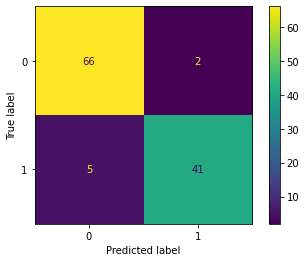

In [53]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=0)
randomModel = classificacaoTrainTestValidate(df, model, 'diagnosis')



--- CLASSIFICAÇÃO - ALGORITMO ---


Accuracy = 92.98


Accuracy (Validação cruzada) = 0.91 (+/- 0.06)


(precision, recall, fscore)

              precision    recall  f1-score   support

           0       0.89      0.96      0.92        68
           1       0.93      0.83      0.87        46

    accuracy                           0.90       114
   macro avg       0.91      0.89      0.90       114
weighted avg       0.91      0.90      0.90       114



Tempo de execução: 0.1111 s


Matriz de confusão

[[65  3]
 [ 8 38]]


Plot da matriz de confusão:



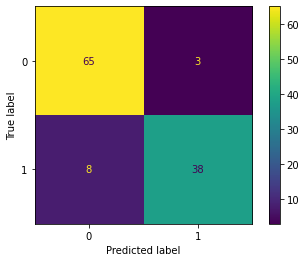

In [54]:
from sklearn.svm import SVC

model = SVC()
svcModel = classificacaoTrainTestValidate(df, model, 'diagnosis')


### Ajustando os hiperparâmetros

In [81]:
def classificacaoTrainTestValidateHiper(df, chosenModel, target,param):
    
    
    model = chosenModel()
    print("\n--- CLASSIFICAÇÃO - ALGORITMO ---")
    x = df.drop(columns=[target])
    y = df[target]
    x_train, x_val_test, y_train, y_val_test = train_test_split(x, y, test_size=0.4, random_state=1)
    x_val, x_test, y_val, y_test = train_test_split(x_val_test, y_val_test, test_size=0.5, random_state=1) 

    tempo_exec_inicial = time.time()

    model.fit(x_train,y_train)
    print("\n\nAccuracy = %.2f" % (100 * np.sum(model.predict(x_val) == y_val)/len(y_val)))

    scores_mlp = cross_val_score(model, df.drop(columns=[target]), df[target], cv=10)
    print("\n\nAccuracy (Validação cruzada) = %.2f (+/- %.2f)" % (scores_mlp.mean(), scores_mlp.std() * 2))

    ## HyperParameter Tunning
    rndSearch = RandomizedSearchCV(model,param, n_iter = 10,cv = 9)
    rndSearch.fit(x_train,y_train)
    print("Tunning best paramns: ",rndSearch.best_params_)
    print("Tunning best score",rndSearch.best_score_)
    model = chosenModel(**rndSearch.best_params_)
    model.fit(x_train,y_train)
    print("\n\nAccuracy after tunning = %.2f" % (100 * np.sum(model.predict(x_val) == y_val)/len(y_val)))

    
    print("\n\n(precision, recall, fscore)\n")
    print(classification_report(y_val, model.predict(x_val)))

    tempo_exec_final = time.time()

    print("\n\nTempo de execução: %.4f s" % (tempo_exec_final - tempo_exec_inicial))

    print("\n\nMatriz de confusão\n")
    print(confusion_matrix(y_val, model.predict(x_val)))

    print("\n\nPlot da matriz de confusão:\n")
    plot_confusion_matrix(model, x_val, y_val, values_format='d')
    plt.show()
    
    return model
    


--- CLASSIFICAÇÃO - ALGORITMO ---


Accuracy = 92.98


Accuracy (Validação cruzada) = 0.96 (+/- 0.07)
Tunning best paramns:  {'n_estimators': 100, 'max_features': 4, 'max_depth': 6, 'criterion': 'entropy', 'bootstrap': True}
Tunning best score 0.9678362573099414


Accuracy after tunning = 92.11


(precision, recall, fscore)

              precision    recall  f1-score   support

           0       0.93      0.94      0.93        68
           1       0.91      0.89      0.90        46

    accuracy                           0.92       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.92      0.92      0.92       114



Tempo de execução: 15.7081 s


Matriz de confusão

[[64  4]
 [ 5 41]]


Plot da matriz de confusão:



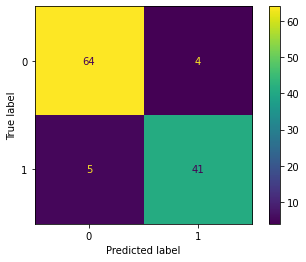

RandomForestClassifier(criterion='entropy', max_depth=6, max_features=4)

In [82]:
param = {'max_depth': [6,9, None], 
         'n_estimators':[50, 70, 100, 150], 
          'max_features': [randint(1,6)],
          'criterion' : ['gini', 'entropy'],
          'bootstrap':[True, False],}

model = RandomForestClassifier
classificacaoTrainTestValidateHiper(df, model, 'diagnosis',param)



--- CLASSIFICAÇÃO - ALGORITMO ---


Accuracy = 90.35


Accuracy (Validação cruzada) = 0.91 (+/- 0.06)


C:\Users\raito\anaconda3\envs\data_science\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Tunning best paramns:  {'kernel': 'linear', 'C': 1}
Tunning best score 0.9736051841314999


Accuracy after tunning = 92.98


(precision, recall, fscore)

              precision    recall  f1-score   support

           0       0.93      0.96      0.94        68
           1       0.93      0.89      0.91        46

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.93       114
weighted avg       0.93      0.93      0.93       114



Tempo de execução: 72.0382 s


Matriz de confusão

[[65  3]
 [ 5 41]]


Plot da matriz de confusão:



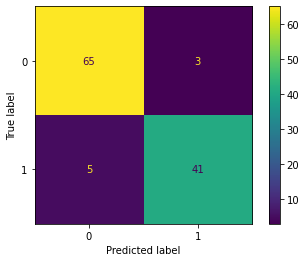

In [83]:
param = {'kernel': ('linear', 'rbf'),'C': [1, 10, 100]}


model = SVC
svcModel = classificacaoTrainTestValidateHiper(df, model, 'diagnosis',param)


Podemos ver que o tunning de parâmetros melhorou o desempenho do SVC.